# Cancer Malignant Classification
### In this file, we will clean any issues with our dataset and seek interesting insights regarding different cancer cells
### After we will use different ML prediction models to see the accuracy of malignant detection

## Extract

Let's start by importing modules and CSV file

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_df = pd.read_csv("./Cancer_Data.csv")
data_df.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Cleaning
The dataset from Kaggle looks pretty good, but there are a few things we can do to clean and improve for our use

**Null values in any columns**

In [191]:
print("Columns with null values: ")
data_df.isnull().sum()

Columns with null values: 


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

We don't have null values in any other column besides one called "Unamed: 32", let's get a better look at it

In [192]:
print(data_df["Unnamed: 32"], data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We can see that we have 569 non-null elements in every column besides Unnamed: 32, which has the same number of 569 null values. There's no use for this so let's drop it.

**Dropping Unnamed:32 column**

In [193]:
data_df = data_df.drop(labels="Unnamed: 32", axis=1)
data_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualizing Data: Exploratory Data Analysis

We have many columns of information to look at, but these can be put into 3 categories:
1. Cancer Cell IDs
2. Cancer Features
3. Cancer Diagnosis

**Cancer Cell IDs**

Each row in our dataframe will have a Cancer Cell ID, this data is an indepedent variable meant only as a name identifier and doesn't provide any information on the characteristics of the cancer cell. We can drop this column later when we try to use prediction models.

**Cancer Features**

Cancer features will be the meat of our dataset, comprised of many different columns explaining different characteristics of a particular Cancer Cell.
This will be in these columns:
- radius_mean
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave points_mean
- symmetry_mean
- fractal_dimension_mean
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- compactness_se
- concavity_se
- concave points_se
- symmetry_se
- fractal_dimension_se
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave points_worst
- symmetry_worst
- fractal_dimension_worst

**Cancer Diagnosis**

This is the more signicant column in our dataset, denoted by 'M' for Malignant or 'B' for Benign in each row. This dictactes whether that particular Cancer with its characteristics were malignant or benign. Malignant tumors can grow rapidly, invade and destroy nearby normal tissues, and spread throughout the body. On the otherhand, benign tumors tend to grow slowly and do not spread. This is important to diagnose whether certain cells are cancerous and pose a threat or not.

## Seperating and creating a new subsets

Here is a subset pertaining to the visual characteristics (vc) of a cancer cell

In [194]:
vc_df = pd.DataFrame(data_df[["diagnosis","radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"]])
vc_df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Additionally, we can create a Standard Error subset from our dataset to look at how different the population mean is from our sample means. In our case the discrepancy between our means in data. The less of discrepancy the greater the quality and confidence level we have for our data.

In [195]:
se_df = pd.DataFrame(data_df[["radius_se", "texture_se", "perimeter_se"
, "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se"]])
se_df.head(5)

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


Looking at our table we can see how many cells were malignant and benign

In [196]:
data_df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Let's visualize this in a bar and pie chart for a comparison

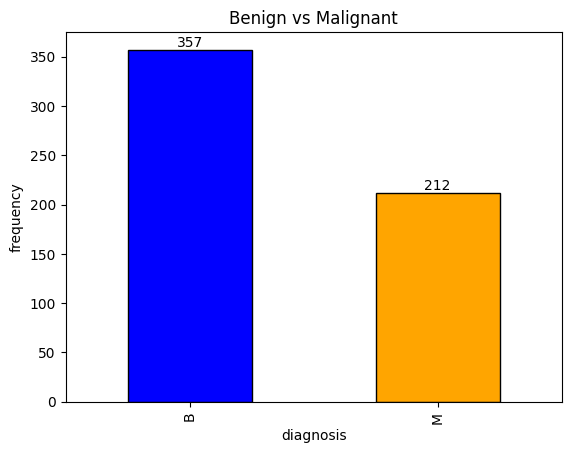

In [197]:
fig, ax = plt.subplots()
data_df["diagnosis"].value_counts().plot(ax = ax, kind = "bar", ylabel="frequency", color=["blue","orange"], edgecolor="black")
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Benign vs Malignant")

plt.show()

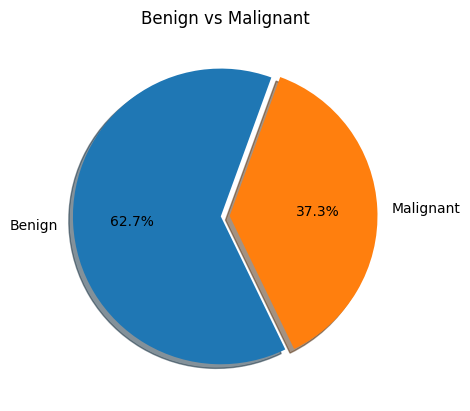

In [198]:
plt.pie(data_df['diagnosis'].value_counts(), labels=["Benign", "Malignant"], autopct="%1.1f%%", shadow=True, startangle=70, explode=(0.03, 0.03))
plt.title("Benign vs Malignant")

plt.show()

## Analysis

Maximum, Minimum, and Average

**Dimensions**

In [199]:
max_df = pd.DataFrame(vc_df[["radius_mean", "perimeter_mean", "area_mean"]].max(), columns=["Maximum"]).T
min_df = pd.DataFrame(vc_df[["radius_mean", "perimeter_mean", "area_mean"]].min(), columns=["Minimum"]).T
avg_df = pd.DataFrame(vc_df[["radius_mean", "perimeter_mean", "area_mean"]].mean(), columns=["Average"]).T

In [200]:
dims_df = pd.concat([max_df, min_df, avg_df], axis=0)
dims_df

,radius_mean,perimeter_mean,area_mean
Maximum,28.110000,188.500000,2501.000000
Minimum,6.981000,43.790000,143.500000
Average,14.127292,91.969033,654.889104


The average radius of all cancer cells is 14.12, while the max is 28.11 and min is 6.98 in our dataset. The average permeter of all cancer cells is 91.97, while the max is 188.5 and min is 43.79 in our dataset. The average area of all cancer cells is 654.89, while the max is 2501 and min is 143.5 in our dataset.

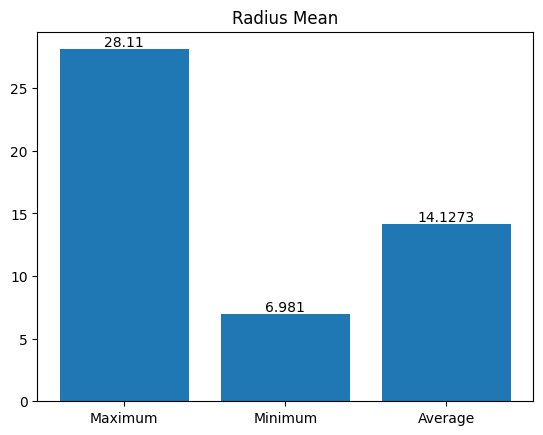

In [201]:
fig, ax = plt.subplots()
plt.bar(dims_df.index, dims_df["radius_mean"])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Radius Mean")
plt.show()

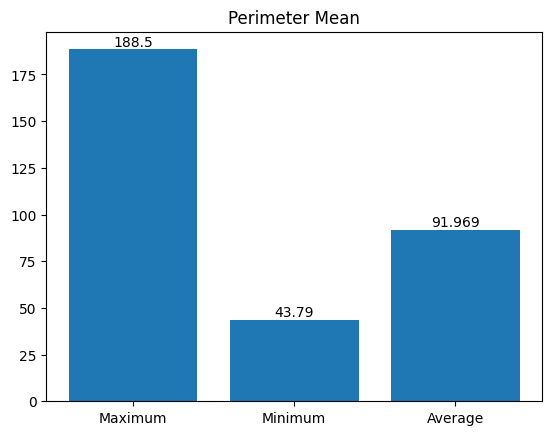

In [202]:
fig, ax = plt.subplots()
plt.bar(dims_df.index, dims_df["perimeter_mean"])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Perimeter Mean")
plt.show()

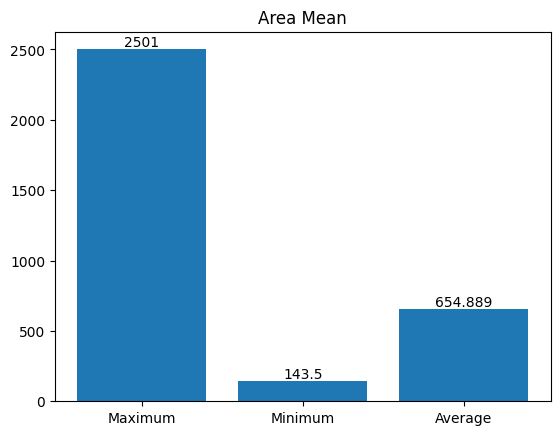

In [203]:
fig, ax = plt.subplots()
plt.bar(dims_df.index, dims_df["area_mean"])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Area Mean")
plt.show()

Other Maximum, Minimum, and Average to look at

In [204]:
otherMax_df = pd.DataFrame(vc_df[["texture_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"]].max(), columns=["Maximum"]).T
otherMin_df = pd.DataFrame(vc_df[["texture_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"]].min(), columns=["Minimum"]).T
otherAvg_df = pd.DataFrame(vc_df[["texture_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"]].mean(), columns=["Average"]).T

otherVisuals_df = pd.concat([otherMax_df, otherMin_df, otherAvg_df], axis=0)
otherVisuals_df

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
Maximum,39.280000,0.16340,0.345400,0.426800,0.201200,0.304000,0.097440
Minimum,9.710000,0.05263,0.019380,0.000000,0.000000,0.106000,0.049960
Average,19.289649,0.09636,0.104341,0.088799,0.048919,0.181162,0.062798


In [205]:
otherVisuals_df["texture_mean"].describe()

count     3.000000
mean     22.759883
std      15.087350
min       9.710000
25%      14.499824
50%      19.289649
75%      29.284824
max      39.280000
Name: texture_mean, dtype: float64

We can **concat** our dimensions and other visual analysis dataframes together to see it as one

In [206]:
pd.concat([dims_df, otherVisuals_df], axis=1)

,radius_mean,perimeter_mean,area_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
Maximum,28.110000,188.500000,2501.000000,39.280000,0.16340,0.345400,0.426800,0.201200,0.304000,0.097440
Minimum,6.981000,43.790000,143.500000,9.710000,0.05263,0.019380,0.000000,0.000000,0.106000,0.049960
Average,14.127292,91.969033,654.889104,19.289649,0.09636,0.104341,0.088799,0.048919,0.181162,0.062798


Let's look at how texture_mean and radius_mean can relate to whether a cancer cell is malignant or benign using a scatter plot

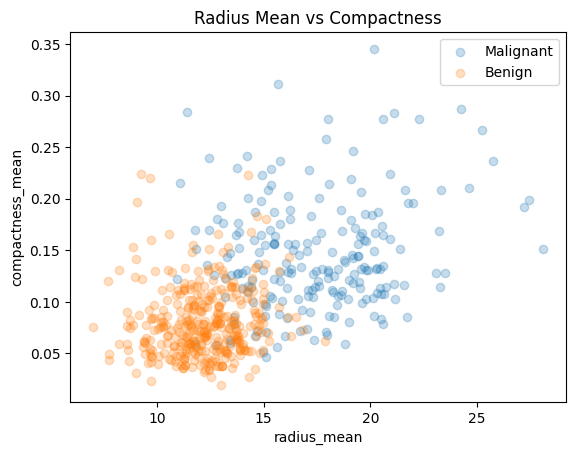

In [207]:
m_diag = data_df[data_df["diagnosis"] == 'M']
b_diag = data_df[data_df["diagnosis"] == 'B']

plt.scatter(m_diag["radius_mean"], m_diag["compactness_mean"], label="Malignant", alpha=0.25)
plt.scatter(b_diag["radius_mean"], b_diag["compactness_mean"], label="Benign", alpha=0.25)

plt.title("Radius Mean vs Compactness")
plt.xlabel("radius_mean")
plt.ylabel("compactness_mean")
plt.legend()

plt.show()

We can look at another comparison with area_mean and smoothness_mean

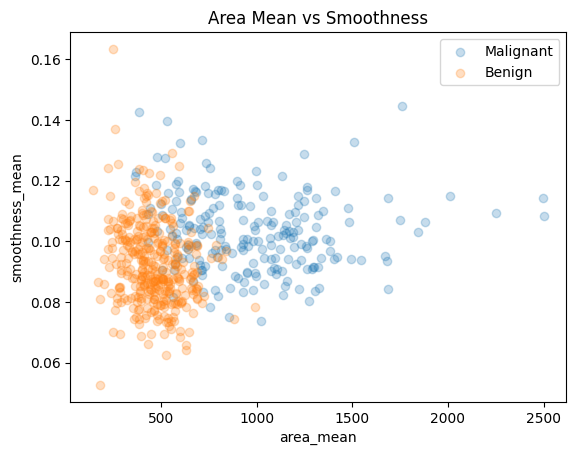

In [208]:
plt.scatter(m_diag["area_mean"], m_diag["smoothness_mean"], label="Malignant", alpha=0.25)
plt.scatter(b_diag["area_mean"], b_diag["smoothness_mean"], label="Benign", alpha=0.25)

plt.title("Area Mean vs Smoothness")
plt.xlabel("area_mean")
plt.ylabel("smoothness_mean")
plt.legend()

plt.show()

Looking at these two scatter plots we can make the deduction that there is a noticeable trend in statistical charactertics between a malignant cancer cell and a benign 

### 1.  Malignant cancer cells scaler larger in radius and compactness than benign cells
### 2. Malignant cancer cells can range in smoothness, but tend to be larger in area

Here's a heatmap of all our different cancer features, but in order to use DataFrame.corr() let's convert our diagnosis column to binary integers

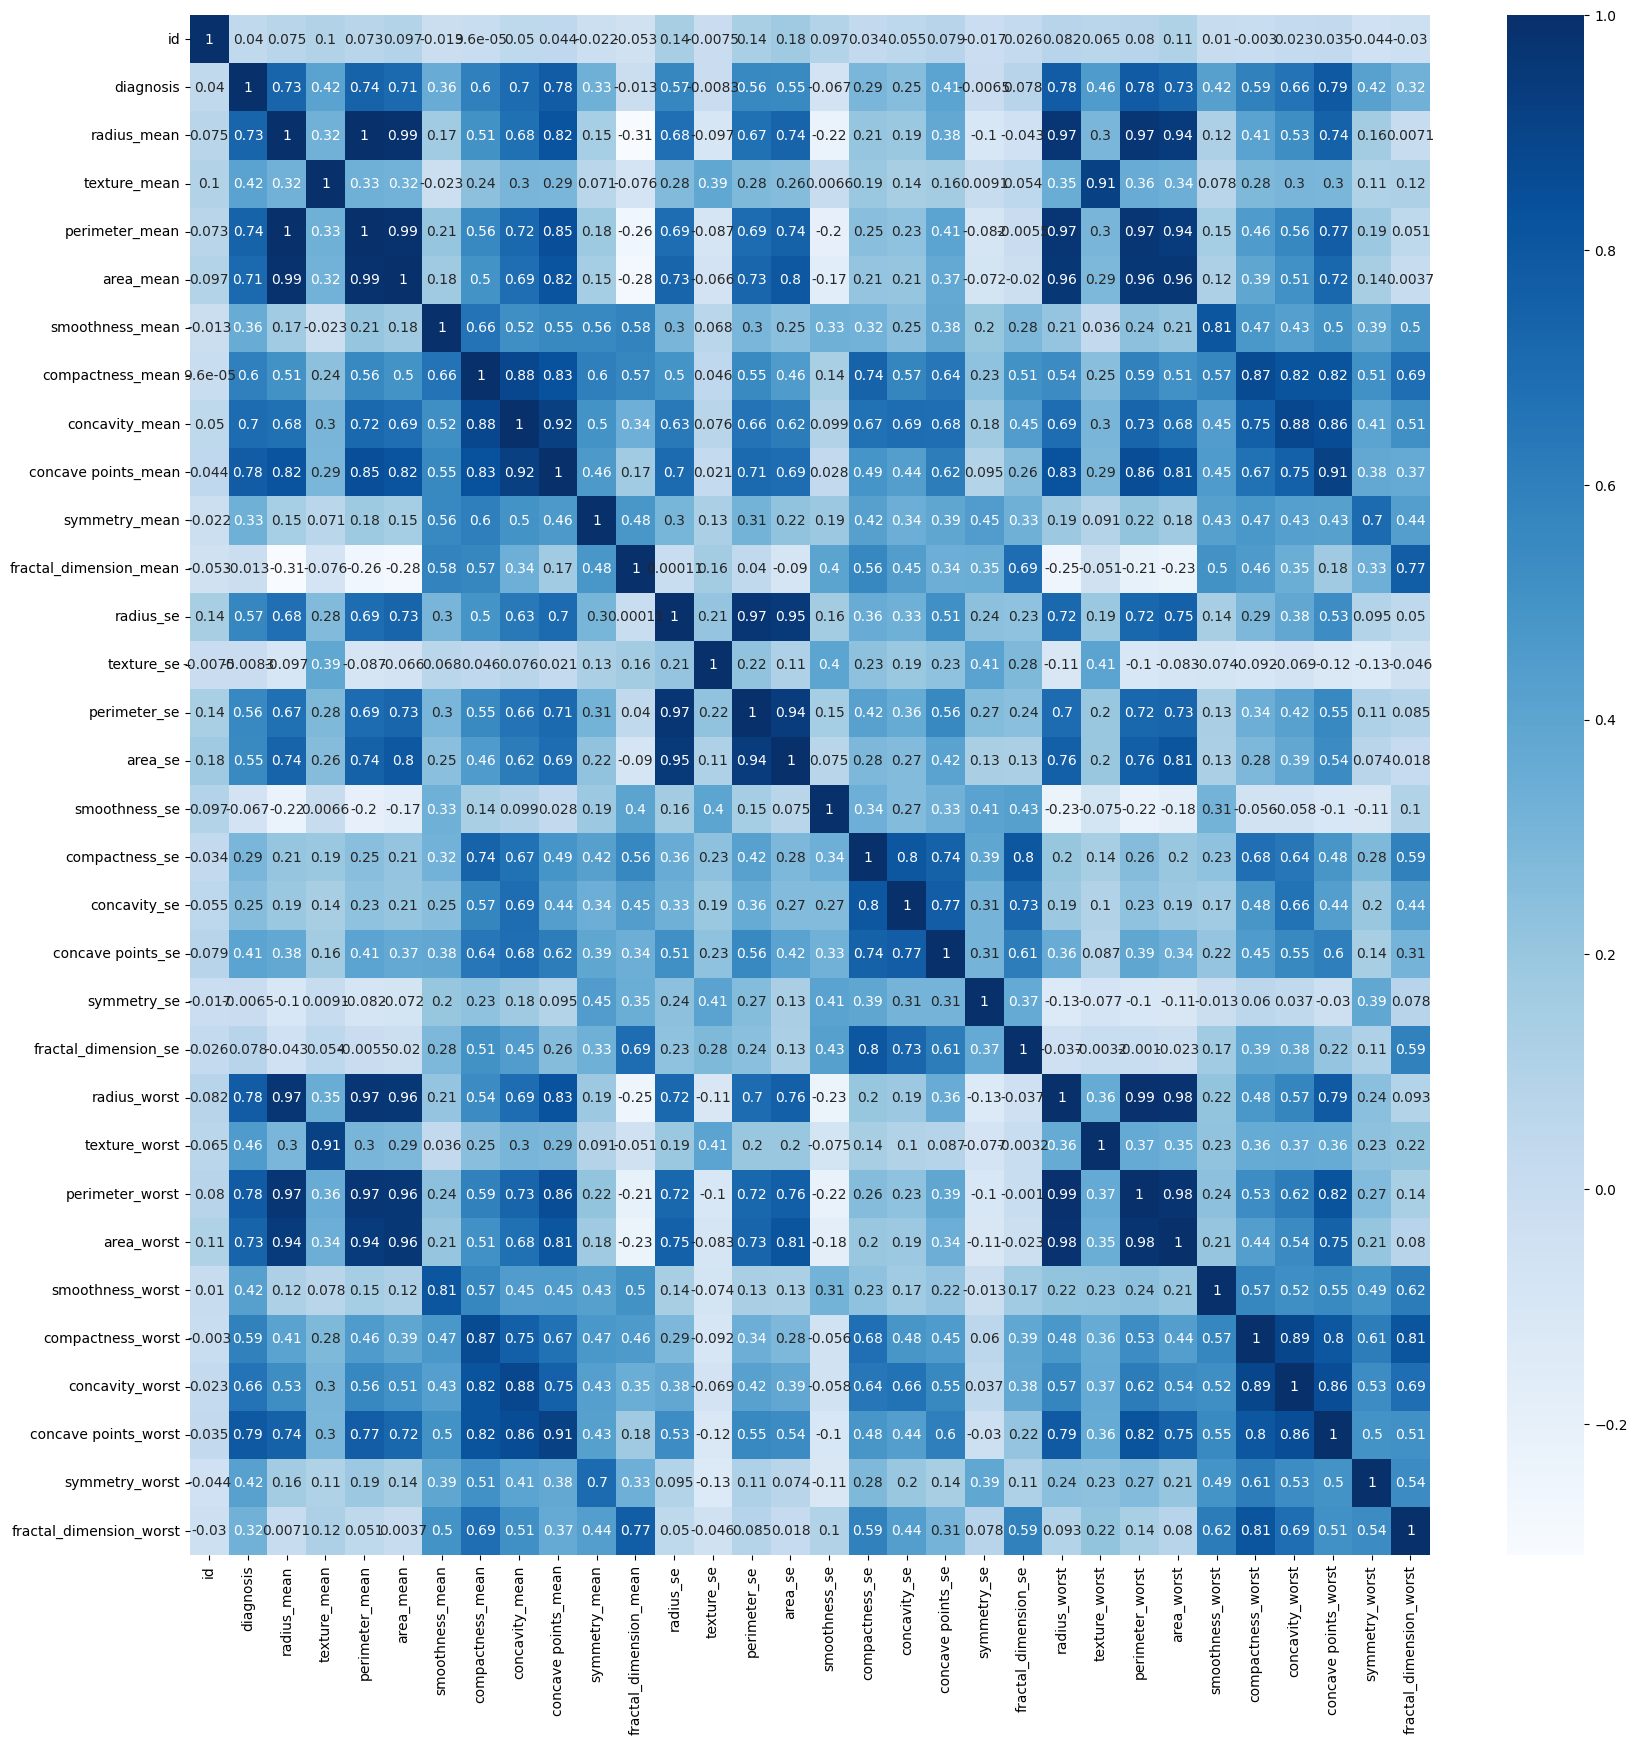

In [209]:
plt.figure(figsize=(20,20))
data_df['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)

sns.heatmap(data_df.corr(), cbar=True, annot=True, cmap='Blues')
plt.show()

## Extension: 95% Logistic Regression Classification

Let's import any modules we need for prediction models

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Drop cancer cell id in data_df to not skew our data

In [211]:
data_df = data_df.drop(labels="id", axis=1)

In [220]:

# X: features, y: target
X, y = data_df.drop('diagnosis', axis=1), data_df[['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

model_dict = {}


Logistic Regression with Accuracy Score

In [221]:
classifier = LogisticRegression(random_state=43)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred)
model_dict['logistic_regression'] = accuracy_log_reg
print(accuracy_log_reg)

0.9468085106382979


c:\Users\stvch\Documents\Ascendion\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\stvch\Documents\Ascendion\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## We have reached a classification accuracy score of 95% of correctly estimating Malignant or Benign diagnosis in a cancer cell